## Setup Drive and Data Folder

In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import os


STEPS_PER_BATCH=32
PRECISION = 4 # 3 of digits to keep after the decimal point
SEQUENCE_LENGHT=40
RUNNING_ON_COLAB = False # we assume running on CoLab! Change to False if running locally.

*italicized text*

In [3]:
## mount gdrive

# !conda install pandas --yes
# from google.colab import drive
# drive.mount("/content/gdrive")

In [4]:
# If running locally, define current working path
path = os.getcwd()

# If Google colab
if RUNNING_ON_COLAB:
    path = "/content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData"

print(path)

# define current data path. This is after we did classification. We have done some
# cleaning already.
data_path = path + '/fl_testbed/version2/data/initial'
print(data_path)

/home/jose/FL_AM_Defect-Detection
/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


## Util - add RUL column

In [5]:
csv_file = data_path + '/combined_offset_misalignment.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
df = pd.concat(df_temp, ignore_index=True)

In [6]:
#0

In [7]:
# Let's find the youngest & oldest timestamp

df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

youngest = min(df.wf_start_time)
oldest = max(df.wf_start_time)
print(youngest)
print(oldest)
span = oldest - youngest
print(span)
print(span.total_seconds())

## Using Oldest - current to determine the RUL
df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0


In [8]:
#1

In [9]:
# Let's find the youngest & oldest timestamp
dfs=[]
for i in df.status.unique():
    print(i)
    _df=df[df['status']==i]
    _df['wf_start_time'] = pd.to_datetime(_df['wf_start_time']) # make sure it is datetime

    youngest = min(_df.wf_start_time)
    oldest = max(_df.wf_start_time)
    print(youngest)
    print(oldest)
    span = oldest - youngest
    print(span)
    print(span.total_seconds())

    ## Using Oldest - current to determine the RUL
    _df['rul'] = _df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())
    dfs.append(_df)



6.25mm_Offset
2022-08-22 15:37:54.000007
2022-08-31 20:42:09.000007
9 days 05:04:15
795855.0


/tmp/ipykernel_163079/1940519888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['wf_start_time'] = pd.to_datetime(_df['wf_start_time']) # make sure it is datetime
/tmp/ipykernel_163079/1940519888.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['rul'] = _df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())
/tmp/ipykernel_163079/1940519888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

3mm_Offset
2022-08-18 14:12:00.000007
2022-08-19 21:13:12.000007
1 days 07:01:12
111672.0
No_Offset


/tmp/ipykernel_163079/1940519888.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['rul'] = _df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())
/tmp/ipykernel_163079/1940519888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['wf_start_time'] = pd.to_datetime(_df['wf_start_time']) # make sure it is datetime


2022-08-09 14:03:22.000007
2022-08-12 20:24:35.000007
3 days 06:21:13
282073.0
12.7mm_Offset


/tmp/ipykernel_163079/1940519888.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['rul'] = _df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())
/tmp/ipykernel_163079/1940519888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['wf_start_time'] = pd.to_datetime(_df['wf_start_time']) # make sure it is datetime
/tmp/ipykernel_163079/1940519888.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2022-09-01 14:26:49.000007
2022-09-01 20:11:50.000007
0 days 05:45:01
20701.0
1mm_Offset
2022-08-15 14:02:57.000007
2022-08-17 21:23:11.000007
2 days 07:20:14
199214.0


/tmp/ipykernel_163079/1940519888.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['rul'] = _df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())


In [10]:
df=pd.concat(dfs,ignore_index=True).drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

KeyError: "['Unnamed: 0.1'] not found in axis"

In [ ]:
df=df.sort_values(['wf_start_time','status', 'rul'], ascending=[True,True, False])

In [ ]:
df.head()

In [ ]:
# for i in df.status.unique():
#df[df['status']=='3mm_Offset'].rul.plot()
#
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(18, 6), dpi=80)
x = np.array(df[df['status']=='6.25mm_Offset'].wf_start_time)
y = np.array(df[df['status']=='6.25mm_Offset'].rul)
#my_xticks = ['John','Arnold','Mavis','Matt']
# plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()


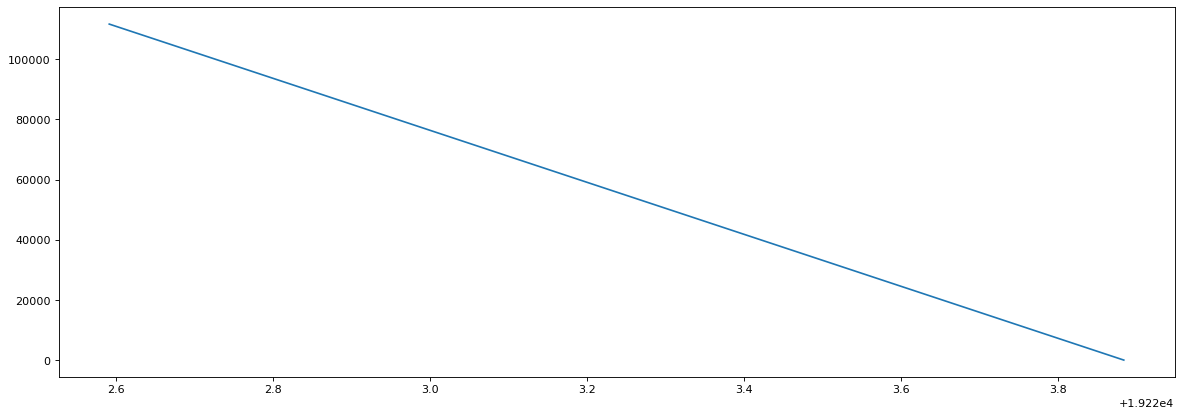

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates
plt.figure(figsize=(18, 6), dpi=80)
x = np.array(dates.date2num(df[df['status']=='3mm_Offset'].wf_start_time))
y = np.array(df[df['status']=='3mm_Offset'].rul)
#my_xticks = ['John','Arnold','Mavis','Matt']
# plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()


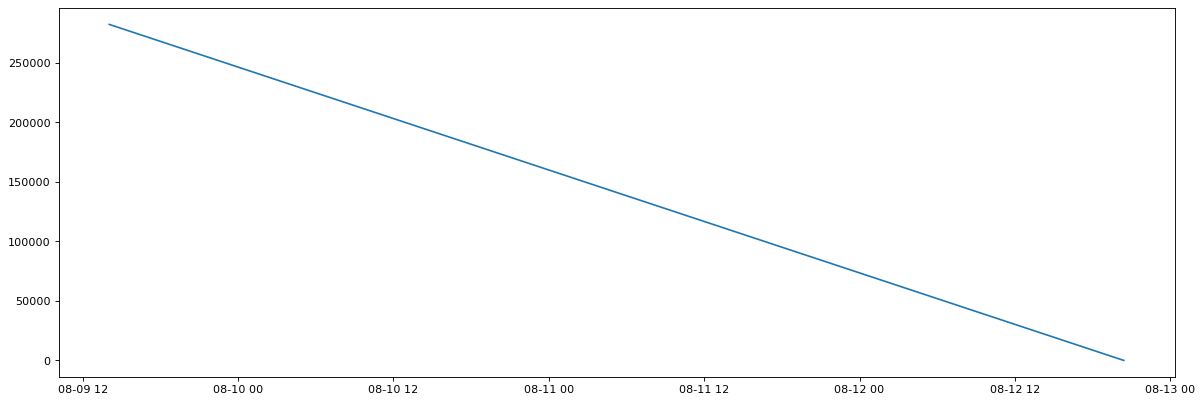

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(18, 6), dpi=80)
x = np.array(df[df['status']=='No_Offset'].wf_start_time)
y = np.array(df[df['status']=='No_Offset'].rul)
#my_xticks = ['John','Arnold','Mavis','Matt']
# plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()


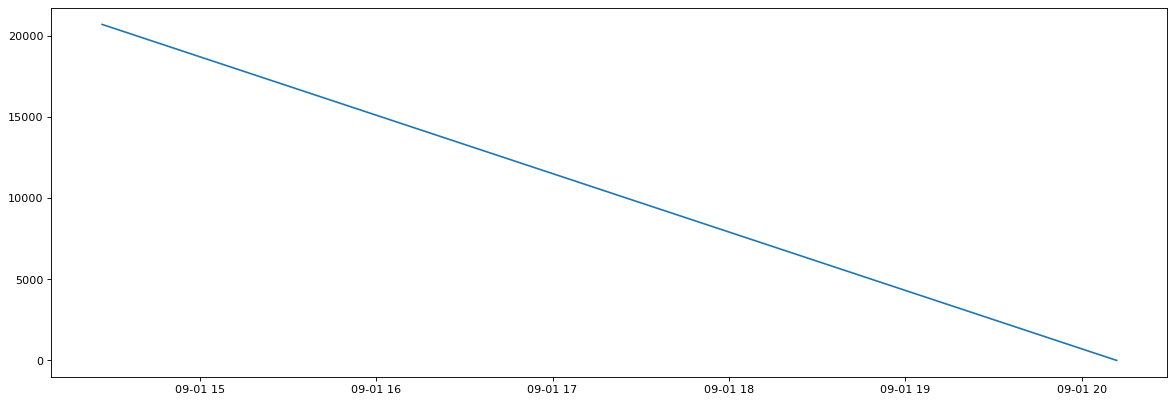

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(18, 6), dpi=80)
x = np.array(df[df['status']=='12.7mm_Offset'].wf_start_time)
y = np.array(df[df['status']=='12.7mm_Offset'].rul)
#my_xticks = ['John','Arnold','Mavis','Matt']
# plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()


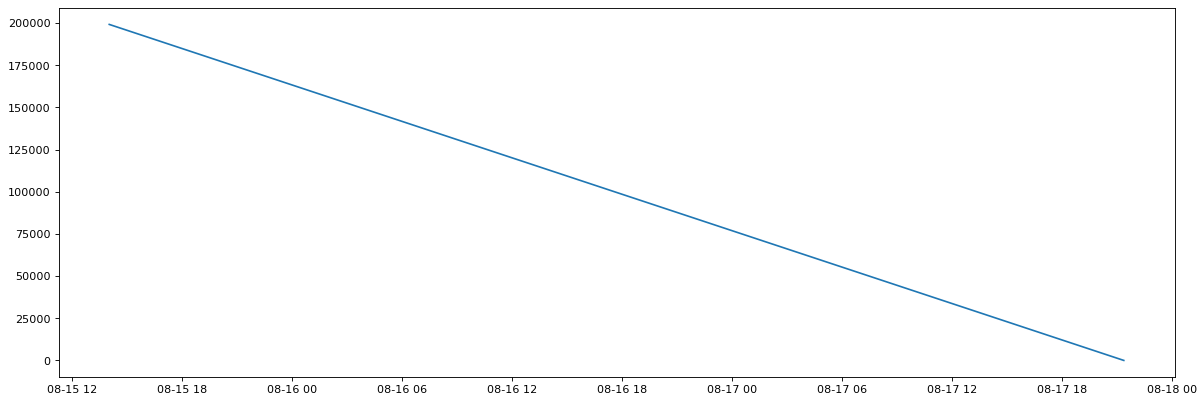

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(18, 6), dpi=80)
x = np.array(df[df['status']=='1mm_Offset'].wf_start_time)
y = np.array(df[df['status']=='1mm_Offset'].rul)
#my_xticks = ['John','Arnold','Mavis','Matt']
# plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()


In [15]:
# DONE

/home/jose/FL_AM_Defect-Detection


In [8]:
# save back with RUL
df.to_csv(data_path + '/combined_offset_misalignment_with_RUL.csv')


In [8]:
!pwd && cd "fl_testbed/version2/data/initial"  && ls 

/home/jose/FL_AM_Defect-Detection
combined_angular_misalignment_with_RUL.csv
combined_offset_misalignment.csv
combined_offset_misalignment_with_RUL.csv
random_forest_offset_RUL.joblib


## LSTM Regression

In [5]:
## Common imports
colab = False

import pandas as pd
import numpy as np
import csv
import os

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

from sklearn.metrics import r2_score, mean_squared_error
# from pandas_ml import ConfusionMatrix

import matplotlib
import matplotlib.pyplot as plt
plt.style.available
%matplotlib inline

# to make this notebook's output stable across runs
RNDSEED = np.random.seed(39)

2023-05-07 16:37:34.050056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 16:37:34.698862: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Exploring the data a bit & prep the df

In [6]:
## future, let's read the file
if colab == False:
    csv_file = data_path+"/combined_offset_misalignment_with_RUL.csv"
else:
    csv_file = path + '/results/combined_offset_misalignment_with_RUL.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
big_df = pd.concat(df_temp)

In [7]:
big_df.status.unique()

array(['6.25mm_Offset', '3mm_Offset', 'No_Offset', '12.7mm_Offset',
       '1mm_Offset'], dtype=object)

In [8]:
print(big_df.status.value_counts())
for i in big_df['status'].unique():
    print(big_df[big_df['status']==i]['rul'].max(),big_df[big_df['status']==i]['rul'].min())

No_Offset        79205
1mm_Offset       73082
3mm_Offset       36248
6.25mm_Offset    29588
12.7mm_Offset    20599
Name: status, dtype: int64
880436.0 84581.0
1231190.0 1119518.0
2009308.0 1727235.0
20701.0 0.0
1490933.0 1291719.0


In [9]:
# df = big_df # reset 


#ONL:Y ONE SCENARIO

#big_df['status']=='1mm_Offset' BIG ERRROR NOT PERFORMING GOOD!
#big_df['status']=='12.7mm_Offset' LOW ERROR 
df=big_df[big_df['status']=='1mm_Offset']#'12.7mm_Offset'12.7mm_Offset 1mm_Offset  6.25mm_Offset


# drop unwanted cols
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))] # drop Unnamed
df = df[df.columns.drop(list(df.filter(regex='wf_start_time')))] # drop time column
df = df[df.columns.drop(list(df.filter(regex='status')))] # drop status column




In [10]:
df.shape

(73082, 47)

In [11]:
df.columns

Index(['Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVertical_CrestFacto

In [12]:
df

,Probe_1_AxialDirection_CrestFactor_g~g,Probe_1_AxialDirection_DerivedPeak_g,Probe_1_AxialDirection_Peak~Peak_g,Probe_1_AxialDirection_RMS_g,Probe_1_AxialDirection_TruePeak_g,Probe_1_AxialDirection_HighFrequency_grms,Probe_1_AxialDirection_Kurtosis_g~g,Probe_2_RadialVertical_CrestFactor_g~g,Probe_2_RadialVertical_DerivedPeak_g,Probe_2_RadialVertical_Peak~Peak_g,...,Probe_6_BearingRadial_Peak~Peak_g,Probe_6_BearingRadial_RMS_g,Probe_6_BearingRadial_TruePeak_g,Probe_6_BearingRadial_HighFrequency_grms,Probe_6_BearingRadial_Kurtosis_g~g,Thermocouple 1_Value,Thermocouple 2_Value,Thermocouple 3_Value,Thermocouple 4_Value,rul
165640,6.8269,0.1515,1.4326,0.1072,0.7315,0.0102,12.4342,6.2302,0.4380,3.6929,...,0.5253,0.0334,0.3155,0.0049,13.1192,72.2903,72.0235,72.1164,72.4454,1401220.0
165641,5.8461,0.1526,1.1989,0.1079,0.6307,0.0639,6.0484,4.8879,1.7705,11.7393,...,0.3246,0.0371,0.1839,0.0200,3.6969,72.2917,72.0019,72.0531,72.4213,1401219.0
165642,5.0788,0.1731,1.2325,0.1224,0.6217,0.0847,4.3077,5.0734,1.3562,9.4772,...,0.3077,0.0350,0.1543,0.0228,4.9852,72.1954,71.9371,72.0394,72.4093,1401218.0
165643,2.7003,0.2068,0.7652,0.1463,0.3949,0.0312,2.1515,3.0869,0.4612,1.9955,...,0.1044,0.0144,0.0549,0.0073,2.8565,72.1970,71.9080,71.9899,72.4109,1401217.0
165644,3.2576,0.1725,0.7610,0.1219,0.3972,0.0321,2.7702,3.1347,0.4640,2.0206,...,0.1056,0.0144,0.0548,0.0070,2.9211,72.2162,71.9042,72.0210,72.4131,1401216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,3.2750,0.1771,0.7867,0.1252,0.4102,0.0499,2.4770,3.2238,0.3979,1.8137,...,0.0961,0.0129,0.0545,0.0044,3.1400,73.5705,73.2741,73.3993,73.7809,1464954.0
238718,3.0359,0.1750,0.7433,0.1237,0.3756,0.0490,2.3456,3.0837,0.3984,1.7275,...,0.1100,0.0132,0.0555,0.0045,3.1751,73.6015,73.3187,73.4508,73.7080,1464953.0
238719,2.8791,0.1622,0.6565,0.1147,0.3302,0.0495,2.4121,3.2785,0.3998,1.8481,...,0.0941,0.0126,0.0490,0.0044,3.0785,73.6119,73.2891,73.4424,73.7252,1464952.0
238720,3.8311,0.1496,0.7588,0.1058,0.4053,0.0258,3.0219,5.0555,0.2655,1.8198,...,0.1041,0.0122,0.0558,0.0030,3.3732,73.6241,73.3149,73.4350,73.7799,1464951.0


In [13]:
 df=df[['rul','Probe_6_BearingRadial_HighFrequency_grms', 'Probe_5_RadialHorizontal_TruePeak_g', 'Probe_3_RadialHorizontal_Peak~Peak_g', 'Probe_4_RadialVertical_HighFrequency_grms']]

# Tabu;lar data augmentation

In [29]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import deep_tabular_augmentation as dta
import warnings; warnings.simplefilter('ignore')

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [31]:
df.head()

,rul,Probe_6_BearingRadial_HighFrequency_grms,Probe_5_RadialHorizontal_TruePeak_g,Probe_3_RadialHorizontal_Peak~Peak_g,Probe_4_RadialVertical_HighFrequency_grms
165640,1401220.0,0.0049,1.2814,3.6244,0.0474
165641,1401219.0,0.0200,6.2719,19.5444,0.2268
165642,1401218.0,0.0228,6.0107,16.1773,0.2866
165643,1401217.0,0.0073,0.8953,2.8570,0.1872
165644,1401216.0,0.0070,0.9175,2.9260,0.1694


In [38]:
cols = df.columns

In [39]:
def load_and_standardize_data(df):
#     # read in from csv
#     df = pd.read_csv(path, sep=',')
    # replace nan with -99
    df = df.fillna(-99)
    df = df.values.reshape(-1, df.shape[1]).astype('float32')
    # randomly split
    X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)
    # standardize values
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)   
    return X_train, X_test, scaler

In [40]:
from torch.utils.data import Dataset, DataLoader
class DataBuilder(Dataset):
    def __init__(self, path, train=True):
        self.X_train, self.X_test, self.standardizer = load_and_standardize_data(df)
        if train:
            self.x = torch.from_numpy(self.X_train)
            self.len=self.x.shape[0]
        else:
            self.x = torch.from_numpy(self.X_test)
            self.len=self.x.shape[0]
        del self.X_train
        del self.X_test 
    def __getitem__(self,index):      
        return self.x[index]
    def __len__(self):
        return self.len

In [41]:
traindata_set=DataBuilder(df, train=True)
testdata_set=DataBuilder(df, train=False)

trainloader=DataLoader(dataset=traindata_set,batch_size=1024)
testloader=DataLoader(dataset=testdata_set,batch_size=1024)

In [42]:
trainloader.dataset.x.shape, testloader.dataset.x.shape

(torch.Size([51157, 5]), torch.Size([21925, 5]))

In [46]:
D_in = traindata_set.x.shape[1]
H = 50
H2 = 12

autoenc_model = dta.AutoencoderModel(trainloader, testloader, device, D_in, H, H2)

TypeError: __init__() takes from 3 to 4 positional arguments but 7 were given

### DataSplit

In [14]:
## true orignal ones
# data split
X_train, X_residual, y_train, y_residual = train_test_split(df.drop('rul', axis=1), df['rul'],test_size=0.20,shuffle=False)



In [15]:
print(X_train.shape, y_train.shape)

(58465, 4) (58465,)


In [16]:
#VALIDATION:

X_vals, X_test, y_vals, y_test = train_test_split(X_residual, y_residual,shuffle=False,test_size=0.5)


In [17]:
print(X_vals.shape, y_vals.shape)
print(X_test.shape, y_test.shape)

(7308, 4) (7308,)
(7309, 4) (7309,)


## Vals (FOR HYPERPARAMETER TUNNING)

In [18]:

X_vals = X_vals[X_vals.columns.drop(list(X_vals.filter(regex='wf_start_time')))] # drop time column
X_vals = X_vals[X_vals.columns.drop(list(X_vals.filter(regex='status')))] # drop status column

out_seq = np.array(y_vals)#out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
scaler = MinMaxScaler()
X_vals=scaler.fit_transform(X_vals)
dataset = np.array(X_vals)#hstack((in_seq1, in_seq2))

pd.DataFrame(dataset)




# shift the target sample by one step
out_seq = np.insert(out_seq, 0, 0)
#pre

out_seq = np.delete(out_seq, -1)
# define generator
n_input = SEQUENCE_LENGHT #leght of the sequence timesteps

validation_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
# print each sample
# for i in range(len(validation_generator)):
#     x, y = generator[i]
#     print('%s => %s' % (x, y))



# Testing

In [19]:


out_seq = np.array(y_test)#out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
scaler = MinMaxScaler()
X_test=scaler.fit_transform(X_test)
dataset = np.array(X_test)#hstack((in_seq1, in_seq2))

pd.DataFrame(dataset)




# shift the target sample by one step
out_seq = np.insert(out_seq, 0, 0)
#pre

out_seq = np.delete(out_seq, -1)
# define generator
n_input = SEQUENCE_LENGHT #leght of the sequence timesteps
testing_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
# print each sample
# for i in range(len(testing_generator)):
#     x, y = generator[i]
#     print('%s => %s' % (x, y))



# Data observation  "Multivariate Inputs and Dependent Series Example"

In [20]:
for i in range(len(testing_generator)):
    x, y = testing_generator[i]
    print(x.shape, y.shape)

(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4) (32,)
(32, 40, 4

In [21]:

print(len(testing_generator[0][0][0][0]))
print(testing_generator[0][0][0][0])
print(len(testing_generator[0][0][0]))
print(testing_generator[0][0][0])
print(len(testing_generator[0][0]))
print(testing_generator[0][0])
print(len(testing_generator[0]))
print(testing_generator[0])



4
[0.8974359  0.82635027 0.92536834 0.92914172]
40
[[0.8974359  0.82635027 0.92536834 0.92914172]
 [0.8974359  0.82746261 0.94202899 0.94311377]
 [0.8974359  0.86886664 0.94307278 0.94311377]
 [0.8974359  0.87912495 0.90702156 0.94211577]
 [0.8974359  0.99728093 0.96611666 0.94111776]
 [0.8974359  0.83104684 0.94174796 0.94111776]
 [0.8974359  0.82795699 0.93191216 0.95209581]
 [0.8974359  0.8257323  0.94311293 0.93912176]
 [0.8974359  0.91830429 0.93897788 0.94610778]
 [0.8974359  0.82795699 0.94226986 0.94810379]
 [0.8974359  0.86305772 0.93576619 0.95209581]
 [0.8974359  0.81633914 0.9574451  0.94311377]
 [0.8974359  0.81670992 0.9294231  0.94810379]
 [0.8974359  0.80571005 0.93837569 0.9510978 ]
 [0.92307692 0.84946237 0.94267132 0.9500998 ]
 [0.92307692 0.82610308 0.94901441 0.94810379]
 [0.92307692 0.80904709 0.92757638 0.94610778]
 [0.92307692 0.82165369 0.94062387 0.94510978]
 [0.8974359  0.86985539 0.94106548 0.9500998 ]
 [0.8974359  0.80447411 0.94752901 0.95908184]
 [0.89743

# TIME SERIES

In [22]:
#!mkdir logs/fit/
!rm -rf logs/fit/*
# !sudo firewall-cmd  --add-port=8000/tcp

In [23]:
%load_ext tensorboard
%reload_ext tensorboard
# tensorboard --logdir=/logs/fit/  --port=8001 --host=0.0.0.0
from datetime import datetime
import tensorflow as tf
import warnings

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")

In [24]:
!pwd


/home/jose/FL_AM_Defect-Detection


In [25]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**-7 * 10**(epoch/3))

es=EarlyStopping(
    monitor="val_loss",

    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.001
)

# # checkpoint_filepath = "./tmp/checkpoint"
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
scaler = MinMaxScaler()




In [26]:

#TRAINING
tf.keras.backend.clear_session()

out_seq = np.array(y_train)
# horizontally stack columns

dataset = np.array(X_train)

X_train = scaler.fit_transform(X_train)

# shift the target sample by one step
out_seq = np.insert(out_seq, 0, 0)
#pre
out_seq = np.delete(out_seq, -1)
# define generator
n_input = SEQUENCE_LENGHT #leght of the sequence timesteps

training_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)


# define generator
n_features = X_train.shape[1]

#CNN ARCHITECTURE WORK FINE!! + LSTM seems not to perform good enough

# model = tf.keras.models.Sequential([
#     # "1" 
#     tf.keras.layers.LSTM(46, input_shape = (n_input, n_features), return_sequences = True),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(23),
#     tf.keras.layers.Dropout(0.2),
#     #"2"
#     tf.keras.layers.Dense(1, activation = 'linear')
# ])
model = Sequential()
model.add(Conv1D(filters=120, kernel_size=3, activation='relu', input_shape=(n_input,n_features)))
model.add(Conv1D(filters=80, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))


# model = Sequential()
# model.add(LSTM(
#          units=100,
#          return_sequences=True,
#          input_shape=(n_input, n_features)))
# model.add(Dropout(0.2))
# model.add(LSTM(
#           units=100,
#           return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(units=1, activation='linear'))

model.compile(loss="Huber", optimizer="rmsprop", metrics=['mae'])


# model.compile(loss=tf.keras.losses.Huber(), optimizer = RMSprop(learning_rate=0.001), metrics =['mse','mae'])



history = model.fit(training_generator,
                                        steps_per_epoch=STEPS_PER_BATCH,
                                        epochs=2000,
                                        verbose=1,
                                        #validation_split=0.2,
                                        callbacks=[tensorboard_callback,es],)#,
                                       # validation_data=validation_generator) # class_weight=class_weights)



Epoch 1/2000


2023-05-07 16:37:51.685114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 29912 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
2023-05-07 16:37:52.139900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-07 16:37:53.356673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-07 16:37:54.233775: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f8cbba1d180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-07 16:37:54.233820: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (

32/32 [==============================] - 4s 7ms/step - loss: 1363120.2500 - mae: 1363120.7500
Epoch 2/2000
32/32 [==============================] - 0s 4ms/step - loss: 1348862.8750 - mae: 1348863.3750
Epoch 3/2000
32/32 [==============================] - 0s 4ms/step - loss: 1317610.0000 - mae: 1317610.6250
Epoch 4/2000
32/32 [==============================] - 0s 4ms/step - loss: 1225476.2500 - mae: 1225476.7500
Epoch 5/2000
32/32 [==============================] - 0s 4ms/step - loss: 1061053.6250 - mae: 1061054.2500
Epoch 6/2000
32/32 [==============================] - 0s 5ms/step - loss: 839248.8750 - mae: 839249.3125
Epoch 7/2000
32/32 [==============================] - 0s 4ms/step - loss: 457492.7500 - mae: 457493.3438
Epoch 8/2000
32/32 [==============================] - 0s 4ms/step - loss: 89778.7500 - mae: 89779.2500
Epoch 9/2000
32/32 [==============================] - 0s 4ms/step - loss: 51969.9297 - mae: 51970.4297
Epoch 10/2000
32/32 [==============================] - 0s 4ms/

32/32 [==============================] - 0s 4ms/step - loss: 63548.9023 - mae: 63549.4023
Epoch 54/2000
32/32 [==============================] - 0s 4ms/step - loss: 66960.3984 - mae: 66960.8984
Epoch 55/2000
32/32 [==============================] - 0s 4ms/step - loss: 68815.4922 - mae: 68815.9922
Epoch 56/2000
32/32 [==============================] - 0s 4ms/step - loss: 54290.1641 - mae: 54290.6641
Epoch 57/2000
32/32 [==============================] - 0s 4ms/step - loss: 65199.2539 - mae: 65199.7539
Epoch 58/2000
32/32 [==============================] - 0s 4ms/step - loss: 62020.5664 - mae: 62021.0664
Epoch 59/2000
32/32 [==============================] - 0s 4ms/step - loss: 71222.8047 - mae: 71223.3047
Epoch 60/2000
32/32 [==============================] - 0s 4ms/step - loss: 69468.7422 - mae: 69469.2422
Epoch 61/2000
32/32 [==============================] - 0s 4ms/step - loss: 53869.7617 - mae: 53870.2617
Epoch 62/2000
32/32 [==============================] - 0s 4ms/step - loss: 558

32/32 [==============================] - 0s 4ms/step - loss: 68063.7656 - mae: 68064.2656
Epoch 106/2000
32/32 [==============================] - 0s 4ms/step - loss: 66701.2812 - mae: 66701.7812
Epoch 107/2000
32/32 [==============================] - 0s 4ms/step - loss: 68461.3906 - mae: 68461.8906
Epoch 108/2000
32/32 [==============================] - 0s 4ms/step - loss: 71168.5234 - mae: 71169.0234
Epoch 109/2000
32/32 [==============================] - 0s 4ms/step - loss: 72981.2266 - mae: 72981.7266
Epoch 110/2000
32/32 [==============================] - 0s 4ms/step - loss: 59078.7969 - mae: 59079.2969
Epoch 111/2000
32/32 [==============================] - 0s 4ms/step - loss: 70738.3594 - mae: 70738.8594
Epoch 112/2000
32/32 [==============================] - 0s 4ms/step - loss: 60928.2461 - mae: 60928.7461
Epoch 113/2000
32/32 [==============================] - 0s 4ms/step - loss: 61554.6680 - mae: 61555.1680
Epoch 114/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 68815.3906 - mae: 68815.8906
Epoch 158/2000
32/32 [==============================] - 0s 4ms/step - loss: 58173.2617 - mae: 58173.7617
Epoch 159/2000
32/32 [==============================] - 0s 4ms/step - loss: 75265.5781 - mae: 75266.0781
Epoch 160/2000
32/32 [==============================] - 0s 4ms/step - loss: 65842.7500 - mae: 65843.2500
Epoch 161/2000
32/32 [==============================] - 0s 4ms/step - loss: 60790.6172 - mae: 60791.1172
Epoch 162/2000
32/32 [==============================] - 0s 4ms/step - loss: 69762.1562 - mae: 69762.6562
Epoch 163/2000
32/32 [==============================] - 0s 4ms/step - loss: 62490.2617 - mae: 62490.7617
Epoch 164/2000
32/32 [==============================] - 0s 4ms/step - loss: 70496.4922 - mae: 70496.9922
Epoch 165/2000
32/32 [==============================] - 0s 4ms/step - loss: 60853.5430 - mae: 60854.0430
Epoch 166/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 59160.2852 - mae: 59160.7852
Epoch 210/2000
32/32 [==============================] - 0s 4ms/step - loss: 70538.9922 - mae: 70539.4922
Epoch 211/2000
32/32 [==============================] - 0s 4ms/step - loss: 66242.3125 - mae: 66242.8125
Epoch 212/2000
32/32 [==============================] - 0s 4ms/step - loss: 50675.9961 - mae: 50676.4961
Epoch 213/2000
32/32 [==============================] - 0s 4ms/step - loss: 71980.1250 - mae: 71980.6250
Epoch 214/2000
32/32 [==============================] - 0s 4ms/step - loss: 58373.3086 - mae: 58373.8086
Epoch 215/2000
32/32 [==============================] - 0s 4ms/step - loss: 55408.4922 - mae: 55408.9922
Epoch 216/2000
32/32 [==============================] - 0s 4ms/step - loss: 59551.2031 - mae: 59551.7031
Epoch 217/2000
32/32 [==============================] - 0s 4ms/step - loss: 62267.7617 - mae: 62268.2617
Epoch 218/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 65112.8398 - mae: 65113.3398
Epoch 262/2000
32/32 [==============================] - 0s 4ms/step - loss: 67478.0000 - mae: 67478.5000
Epoch 263/2000
32/32 [==============================] - 0s 4ms/step - loss: 63246.9648 - mae: 63247.4648
Epoch 264/2000
32/32 [==============================] - 0s 4ms/step - loss: 53155.6523 - mae: 53156.1523
Epoch 265/2000
32/32 [==============================] - 0s 4ms/step - loss: 62059.9688 - mae: 62060.4688
Epoch 266/2000
32/32 [==============================] - 0s 4ms/step - loss: 70450.2578 - mae: 70450.7578
Epoch 267/2000
32/32 [==============================] - 0s 4ms/step - loss: 62585.5391 - mae: 62586.0391
Epoch 268/2000
32/32 [==============================] - 0s 4ms/step - loss: 67924.3984 - mae: 67924.8984
Epoch 269/2000
32/32 [==============================] - 0s 4ms/step - loss: 63601.9570 - mae: 63602.4570
Epoch 270/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 69331.5781 - mae: 69332.0781
Epoch 314/2000
32/32 [==============================] - 0s 4ms/step - loss: 74626.2969 - mae: 74626.7969
Epoch 315/2000
32/32 [==============================] - 0s 4ms/step - loss: 62506.6094 - mae: 62507.1094
Epoch 316/2000
32/32 [==============================] - 0s 4ms/step - loss: 69576.1641 - mae: 69576.6641
Epoch 317/2000
32/32 [==============================] - 0s 4ms/step - loss: 59810.9844 - mae: 59811.4844
Epoch 318/2000
32/32 [==============================] - 0s 4ms/step - loss: 77395.6328 - mae: 77396.1328
Epoch 319/2000
32/32 [==============================] - 0s 4ms/step - loss: 74213.5703 - mae: 74214.0703
Epoch 320/2000
32/32 [==============================] - 0s 4ms/step - loss: 66892.0859 - mae: 66892.5859
Epoch 321/2000
32/32 [==============================] - 0s 4ms/step - loss: 71783.4609 - mae: 71783.9609
Epoch 322/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 72068.1016 - mae: 72068.6016
Epoch 366/2000
32/32 [==============================] - 0s 4ms/step - loss: 64116.4805 - mae: 64116.9805
Epoch 367/2000
32/32 [==============================] - 0s 4ms/step - loss: 62689.0781 - mae: 62689.5781
Epoch 368/2000
32/32 [==============================] - 0s 4ms/step - loss: 69848.8906 - mae: 69849.3906
Epoch 369/2000
32/32 [==============================] - 0s 4ms/step - loss: 74833.9297 - mae: 74834.4297
Epoch 370/2000
32/32 [==============================] - 0s 4ms/step - loss: 59012.2930 - mae: 59012.7930
Epoch 371/2000
32/32 [==============================] - 0s 4ms/step - loss: 65666.9531 - mae: 65667.4531
Epoch 372/2000
32/32 [==============================] - 0s 4ms/step - loss: 65796.4219 - mae: 65796.9219
Epoch 373/2000
32/32 [==============================] - 0s 4ms/step - loss: 59023.7266 - mae: 59024.2266
Epoch 374/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 57297.5547 - mae: 57298.0547
Epoch 418/2000
32/32 [==============================] - 0s 4ms/step - loss: 56359.2227 - mae: 56359.7227
Epoch 419/2000
32/32 [==============================] - 0s 4ms/step - loss: 63425.4766 - mae: 63425.9766
Epoch 420/2000
32/32 [==============================] - 0s 4ms/step - loss: 58925.8906 - mae: 58926.3906
Epoch 421/2000
32/32 [==============================] - 0s 4ms/step - loss: 64127.2461 - mae: 64127.7461
Epoch 422/2000
32/32 [==============================] - 0s 4ms/step - loss: 63262.6953 - mae: 63263.1953
Epoch 423/2000
32/32 [==============================] - 0s 4ms/step - loss: 64433.1914 - mae: 64433.6914
Epoch 424/2000
32/32 [==============================] - 0s 4ms/step - loss: 57570.6133 - mae: 57571.1133
Epoch 425/2000
32/32 [==============================] - 0s 4ms/step - loss: 62853.9883 - mae: 62854.4883
Epoch 426/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 65364.3711 - mae: 65364.8711
Epoch 470/2000
32/32 [==============================] - 0s 4ms/step - loss: 74030.3125 - mae: 74030.8125
Epoch 471/2000
32/32 [==============================] - 0s 4ms/step - loss: 63874.0859 - mae: 63874.5859
Epoch 472/2000
32/32 [==============================] - 0s 4ms/step - loss: 63363.5703 - mae: 63364.0703
Epoch 473/2000
32/32 [==============================] - 0s 4ms/step - loss: 59973.5898 - mae: 59974.0898
Epoch 474/2000
32/32 [==============================] - 0s 4ms/step - loss: 75546.9688 - mae: 75547.4688
Epoch 475/2000
32/32 [==============================] - 0s 4ms/step - loss: 69006.1562 - mae: 69006.6562
Epoch 476/2000
32/32 [==============================] - 0s 4ms/step - loss: 59651.2422 - mae: 59651.7422
Epoch 477/2000
32/32 [==============================] - 0s 4ms/step - loss: 67029.5234 - mae: 67030.0234
Epoch 478/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 76160.5781 - mae: 76161.0781
Epoch 522/2000
32/32 [==============================] - 0s 4ms/step - loss: 59977.9219 - mae: 59978.4219
Epoch 523/2000
32/32 [==============================] - 0s 4ms/step - loss: 69688.5703 - mae: 69689.0703
Epoch 524/2000
32/32 [==============================] - 0s 4ms/step - loss: 70999.8047 - mae: 71000.3047
Epoch 525/2000
32/32 [==============================] - 0s 4ms/step - loss: 75827.8828 - mae: 75828.3828
Epoch 526/2000
32/32 [==============================] - 0s 4ms/step - loss: 54905.2930 - mae: 54905.7930
Epoch 527/2000
32/32 [==============================] - 0s 4ms/step - loss: 69614.3750 - mae: 69614.8750
Epoch 528/2000
32/32 [==============================] - 0s 4ms/step - loss: 64481.2422 - mae: 64481.7422
Epoch 529/2000
32/32 [==============================] - 0s 4ms/step - loss: 63938.1367 - mae: 63938.6367
Epoch 530/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 62690.1016 - mae: 62690.6016
Epoch 574/2000
32/32 [==============================] - 0s 4ms/step - loss: 61100.4648 - mae: 61100.9648
Epoch 575/2000
32/32 [==============================] - 0s 4ms/step - loss: 75418.2578 - mae: 75418.7578
Epoch 576/2000
32/32 [==============================] - 0s 4ms/step - loss: 57351.4922 - mae: 57351.9922
Epoch 577/2000
32/32 [==============================] - 0s 4ms/step - loss: 67527.6484 - mae: 67528.1484
Epoch 578/2000
32/32 [==============================] - 0s 4ms/step - loss: 61823.8125 - mae: 61824.3125
Epoch 579/2000
32/32 [==============================] - 0s 4ms/step - loss: 65419.4453 - mae: 65419.9453
Epoch 580/2000
32/32 [==============================] - 0s 4ms/step - loss: 69676.0156 - mae: 69676.5156
Epoch 581/2000
32/32 [==============================] - 0s 4ms/step - loss: 73075.7734 - mae: 73076.2734
Epoch 582/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 50395.9102 - mae: 50396.4102
Epoch 626/2000
32/32 [==============================] - 0s 4ms/step - loss: 61587.8359 - mae: 61588.3359
Epoch 627/2000
32/32 [==============================] - 0s 4ms/step - loss: 71129.6719 - mae: 71130.1719
Epoch 628/2000
32/32 [==============================] - 0s 4ms/step - loss: 71078.0547 - mae: 71078.5547
Epoch 629/2000
32/32 [==============================] - 0s 4ms/step - loss: 59568.4023 - mae: 59568.9023
Epoch 630/2000
32/32 [==============================] - 0s 4ms/step - loss: 69467.8906 - mae: 69468.3906
Epoch 631/2000
32/32 [==============================] - 0s 4ms/step - loss: 60416.8555 - mae: 60417.3555
Epoch 632/2000
32/32 [==============================] - 0s 4ms/step - loss: 55223.0625 - mae: 55223.5625
Epoch 633/2000
32/32 [==============================] - 0s 4ms/step - loss: 60046.5273 - mae: 60047.0273
Epoch 634/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 53378.8594 - mae: 53379.3594
Epoch 678/2000
32/32 [==============================] - 0s 4ms/step - loss: 62060.7227 - mae: 62061.2227
Epoch 679/2000
32/32 [==============================] - 0s 4ms/step - loss: 59701.9180 - mae: 59702.4180
Epoch 680/2000
32/32 [==============================] - 0s 4ms/step - loss: 58636.7578 - mae: 58637.2578
Epoch 681/2000
32/32 [==============================] - 0s 4ms/step - loss: 69346.8438 - mae: 69347.3438
Epoch 682/2000
32/32 [==============================] - 0s 4ms/step - loss: 59044.1211 - mae: 59044.6211
Epoch 683/2000
32/32 [==============================] - 0s 4ms/step - loss: 66527.6797 - mae: 66528.1797
Epoch 684/2000
32/32 [==============================] - 0s 4ms/step - loss: 65920.4219 - mae: 65920.9219
Epoch 685/2000
32/32 [==============================] - 0s 4ms/step - loss: 72497.8672 - mae: 72498.3672
Epoch 686/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 52429.9414 - mae: 52430.4414
Epoch 730/2000
32/32 [==============================] - 0s 4ms/step - loss: 60450.6484 - mae: 60451.1484
Epoch 731/2000
32/32 [==============================] - 0s 4ms/step - loss: 69846.9375 - mae: 69847.4375
Epoch 732/2000
32/32 [==============================] - 0s 4ms/step - loss: 65474.3477 - mae: 65474.8477
Epoch 733/2000
32/32 [==============================] - 0s 4ms/step - loss: 66210.1953 - mae: 66210.6953
Epoch 734/2000
32/32 [==============================] - 0s 4ms/step - loss: 69424.1406 - mae: 69424.6406
Epoch 735/2000
32/32 [==============================] - 0s 4ms/step - loss: 67782.7578 - mae: 67783.2578
Epoch 736/2000
32/32 [==============================] - 0s 4ms/step - loss: 56165.5312 - mae: 56166.0312
Epoch 737/2000
32/32 [==============================] - 0s 4ms/step - loss: 62195.1211 - mae: 62195.6211
Epoch 738/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 55317.6641 - mae: 55318.1641
Epoch 782/2000
32/32 [==============================] - 0s 4ms/step - loss: 66004.8984 - mae: 66005.3984
Epoch 783/2000
32/32 [==============================] - 0s 4ms/step - loss: 48437.1289 - mae: 48437.6289
Epoch 784/2000
32/32 [==============================] - 0s 4ms/step - loss: 58679.6172 - mae: 58680.1172
Epoch 785/2000
32/32 [==============================] - 0s 4ms/step - loss: 62855.1875 - mae: 62855.6875
Epoch 786/2000
32/32 [==============================] - 0s 4ms/step - loss: 60292.8320 - mae: 60293.3320
Epoch 787/2000
32/32 [==============================] - 0s 4ms/step - loss: 61983.1953 - mae: 61983.6953
Epoch 788/2000
32/32 [==============================] - 0s 4ms/step - loss: 59214.3398 - mae: 59214.8398
Epoch 789/2000
32/32 [==============================] - 0s 4ms/step - loss: 66099.5000 - mae: 66100.0000
Epoch 790/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 48741.7266 - mae: 48742.2266
Epoch 834/2000
32/32 [==============================] - 0s 4ms/step - loss: 62767.2969 - mae: 62767.7969
Epoch 835/2000
32/32 [==============================] - 0s 4ms/step - loss: 48457.1484 - mae: 48457.6484
Epoch 836/2000
32/32 [==============================] - 0s 4ms/step - loss: 61957.3906 - mae: 61957.8906
Epoch 837/2000
32/32 [==============================] - 0s 4ms/step - loss: 63676.7227 - mae: 63677.2227
Epoch 838/2000
32/32 [==============================] - 0s 4ms/step - loss: 68570.5000 - mae: 68571.0000
Epoch 839/2000
32/32 [==============================] - 0s 4ms/step - loss: 54846.3359 - mae: 54846.8359
Epoch 840/2000
32/32 [==============================] - 0s 4ms/step - loss: 66727.5781 - mae: 66728.0781
Epoch 841/2000
32/32 [==============================] - 0s 4ms/step - loss: 57149.5938 - mae: 57150.0938
Epoch 842/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 64869.1250 - mae: 64869.6250
Epoch 886/2000
32/32 [==============================] - 0s 4ms/step - loss: 63402.8203 - mae: 63403.3203
Epoch 887/2000
32/32 [==============================] - 0s 4ms/step - loss: 68268.1484 - mae: 68268.6484
Epoch 888/2000
32/32 [==============================] - 0s 4ms/step - loss: 65619.0859 - mae: 65619.5859
Epoch 889/2000
32/32 [==============================] - 0s 4ms/step - loss: 73368.2266 - mae: 73368.7266
Epoch 890/2000
32/32 [==============================] - 0s 4ms/step - loss: 66512.5156 - mae: 66513.0156
Epoch 891/2000
32/32 [==============================] - 0s 4ms/step - loss: 68282.5391 - mae: 68283.0391
Epoch 892/2000
32/32 [==============================] - 0s 4ms/step - loss: 63891.9531 - mae: 63892.4531
Epoch 893/2000
32/32 [==============================] - 0s 4ms/step - loss: 59574.2812 - mae: 59574.7812
Epoch 894/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 60367.4297 - mae: 60367.9297
Epoch 938/2000
32/32 [==============================] - 0s 4ms/step - loss: 65412.3750 - mae: 65412.8750
Epoch 939/2000
32/32 [==============================] - 0s 4ms/step - loss: 59430.0312 - mae: 59430.5312
Epoch 940/2000
32/32 [==============================] - 0s 4ms/step - loss: 61858.4219 - mae: 61858.9219
Epoch 941/2000
32/32 [==============================] - 0s 4ms/step - loss: 64682.3555 - mae: 64682.8555
Epoch 942/2000
32/32 [==============================] - 0s 4ms/step - loss: 66270.1406 - mae: 66270.6406
Epoch 943/2000
32/32 [==============================] - 0s 4ms/step - loss: 68502.6172 - mae: 68503.1172
Epoch 944/2000
32/32 [==============================] - 0s 4ms/step - loss: 61323.0742 - mae: 61323.5742
Epoch 945/2000
32/32 [==============================] - 0s 4ms/step - loss: 68743.6953 - mae: 68744.1953
Epoch 946/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 60000.1172 - mae: 60000.6172
Epoch 990/2000
32/32 [==============================] - 0s 4ms/step - loss: 65696.3750 - mae: 65696.8750
Epoch 991/2000
32/32 [==============================] - 0s 4ms/step - loss: 61354.4336 - mae: 61354.9336
Epoch 992/2000
32/32 [==============================] - 0s 4ms/step - loss: 55896.6719 - mae: 55897.1719
Epoch 993/2000
32/32 [==============================] - 0s 4ms/step - loss: 58069.2266 - mae: 58069.7266
Epoch 994/2000
32/32 [==============================] - 0s 4ms/step - loss: 70224.2812 - mae: 70224.7812
Epoch 995/2000
32/32 [==============================] - 0s 4ms/step - loss: 65101.9062 - mae: 65102.4062
Epoch 996/2000
32/32 [==============================] - 0s 4ms/step - loss: 61496.0547 - mae: 61496.5547
Epoch 997/2000
32/32 [==============================] - 0s 4ms/step - loss: 53951.3398 - mae: 53951.8398
Epoch 998/2000
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 68092.0469 - mae: 68092.5469
Epoch 1042/2000
32/32 [==============================] - 0s 4ms/step - loss: 58551.8555 - mae: 58552.3555
Epoch 1043/2000
32/32 [==============================] - 0s 4ms/step - loss: 64614.3398 - mae: 64614.8398
Epoch 1044/2000
32/32 [==============================] - 0s 4ms/step - loss: 54515.2461 - mae: 54515.7461
Epoch 1045/2000
32/32 [==============================] - 0s 4ms/step - loss: 65491.8984 - mae: 65492.3984
Epoch 1046/2000
32/32 [==============================] - 0s 4ms/step - loss: 56558.6289 - mae: 56559.1289
Epoch 1047/2000
32/32 [==============================] - 0s 4ms/step - loss: 62456.2344 - mae: 62456.7344
Epoch 1048/2000
32/32 [==============================] - 0s 4ms/step - loss: 61097.2266 - mae: 61097.7266
Epoch 1049/2000
32/32 [==============================] - 0s 4ms/step - loss: 53181.2812 - mae: 53181.7812
Epoch 1050/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 57132.2109 - mae: 57132.7109
Epoch 1094/2000
32/32 [==============================] - 0s 4ms/step - loss: 59995.6094 - mae: 59996.1094
Epoch 1095/2000
32/32 [==============================] - 0s 4ms/step - loss: 63548.1719 - mae: 63548.6719
Epoch 1096/2000
32/32 [==============================] - 0s 4ms/step - loss: 57758.0977 - mae: 57758.5977
Epoch 1097/2000
32/32 [==============================] - 0s 4ms/step - loss: 59297.5547 - mae: 59298.0547
Epoch 1098/2000
32/32 [==============================] - 0s 4ms/step - loss: 55460.6797 - mae: 55461.1797
Epoch 1099/2000
32/32 [==============================] - 0s 4ms/step - loss: 49806.2969 - mae: 49806.7969
Epoch 1100/2000
32/32 [==============================] - 0s 4ms/step - loss: 57804.9688 - mae: 57805.4688
Epoch 1101/2000
32/32 [==============================] - 0s 4ms/step - loss: 61848.6562 - mae: 61849.1562
Epoch 1102/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 60539.2773 - mae: 60539.7773
Epoch 1146/2000
32/32 [==============================] - 0s 4ms/step - loss: 68812.3984 - mae: 68812.8984
Epoch 1147/2000
32/32 [==============================] - 0s 4ms/step - loss: 66175.1719 - mae: 66175.6719
Epoch 1148/2000
32/32 [==============================] - 0s 4ms/step - loss: 60877.7734 - mae: 60878.2734
Epoch 1149/2000
32/32 [==============================] - 0s 4ms/step - loss: 56393.0938 - mae: 56393.5938
Epoch 1150/2000
32/32 [==============================] - 0s 4ms/step - loss: 57095.1719 - mae: 57095.6719
Epoch 1151/2000
32/32 [==============================] - 0s 4ms/step - loss: 62622.2852 - mae: 62622.7852
Epoch 1152/2000
32/32 [==============================] - 0s 4ms/step - loss: 66870.0703 - mae: 66870.5703
Epoch 1153/2000
32/32 [==============================] - 0s 4ms/step - loss: 62420.3320 - mae: 62420.8320
Epoch 1154/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 59717.6992 - mae: 59718.1992
Epoch 1198/2000
32/32 [==============================] - 0s 4ms/step - loss: 58499.4883 - mae: 58499.9883
Epoch 1199/2000
32/32 [==============================] - 0s 4ms/step - loss: 62072.5938 - mae: 62073.0938
Epoch 1200/2000
32/32 [==============================] - 0s 4ms/step - loss: 64891.0352 - mae: 64891.5352
Epoch 1201/2000
32/32 [==============================] - 0s 4ms/step - loss: 59304.7969 - mae: 59305.2969
Epoch 1202/2000
32/32 [==============================] - 0s 4ms/step - loss: 58365.0977 - mae: 58365.5977
Epoch 1203/2000
32/32 [==============================] - 0s 4ms/step - loss: 63072.8086 - mae: 63073.3086
Epoch 1204/2000
32/32 [==============================] - 0s 4ms/step - loss: 56740.7461 - mae: 56741.2461
Epoch 1205/2000
32/32 [==============================] - 0s 4ms/step - loss: 58415.3516 - mae: 58415.8516
Epoch 1206/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 53926.9141 - mae: 53927.4141
Epoch 1250/2000
32/32 [==============================] - 0s 4ms/step - loss: 67069.1328 - mae: 67069.6328
Epoch 1251/2000
32/32 [==============================] - 0s 4ms/step - loss: 55553.9883 - mae: 55554.4883
Epoch 1252/2000
32/32 [==============================] - 0s 4ms/step - loss: 65364.3906 - mae: 65364.8906
Epoch 1253/2000
32/32 [==============================] - 0s 4ms/step - loss: 56892.7734 - mae: 56893.2734
Epoch 1254/2000
32/32 [==============================] - 0s 4ms/step - loss: 57734.1094 - mae: 57734.6094
Epoch 1255/2000
32/32 [==============================] - 0s 4ms/step - loss: 49447.1875 - mae: 49447.6875
Epoch 1256/2000
32/32 [==============================] - 0s 4ms/step - loss: 50173.1875 - mae: 50173.6875
Epoch 1257/2000
32/32 [==============================] - 0s 4ms/step - loss: 53984.3164 - mae: 53984.8164
Epoch 1258/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 48088.7734 - mae: 48089.2734
Epoch 1302/2000
32/32 [==============================] - 0s 4ms/step - loss: 55253.5586 - mae: 55254.0586
Epoch 1303/2000
32/32 [==============================] - 0s 4ms/step - loss: 64016.2969 - mae: 64016.7969
Epoch 1304/2000
32/32 [==============================] - 0s 4ms/step - loss: 56478.6719 - mae: 56479.1719
Epoch 1305/2000
32/32 [==============================] - 0s 4ms/step - loss: 61292.4531 - mae: 61292.9531
Epoch 1306/2000
32/32 [==============================] - 0s 4ms/step - loss: 57634.5312 - mae: 57635.0312
Epoch 1307/2000
32/32 [==============================] - 0s 4ms/step - loss: 60622.0117 - mae: 60622.5117
Epoch 1308/2000
32/32 [==============================] - 0s 4ms/step - loss: 61735.4375 - mae: 61735.9375
Epoch 1309/2000
32/32 [==============================] - 0s 4ms/step - loss: 46484.4883 - mae: 46484.9883
Epoch 1310/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 59484.4102 - mae: 59484.9102
Epoch 1354/2000
32/32 [==============================] - 0s 4ms/step - loss: 51990.4023 - mae: 51990.9023
Epoch 1355/2000
32/32 [==============================] - 0s 4ms/step - loss: 66864.4688 - mae: 66864.9688
Epoch 1356/2000
32/32 [==============================] - 0s 4ms/step - loss: 55981.8789 - mae: 55982.3789
Epoch 1357/2000
32/32 [==============================] - 0s 4ms/step - loss: 52309.2773 - mae: 52309.7773
Epoch 1358/2000
32/32 [==============================] - 0s 4ms/step - loss: 58998.3320 - mae: 58998.8320
Epoch 1359/2000
32/32 [==============================] - 0s 4ms/step - loss: 63002.1992 - mae: 63002.6992
Epoch 1360/2000
32/32 [==============================] - 0s 4ms/step - loss: 48000.7422 - mae: 48001.2422
Epoch 1361/2000
32/32 [==============================] - 0s 4ms/step - loss: 53994.8711 - mae: 53995.3711
Epoch 1362/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 56101.6562 - mae: 56102.1562
Epoch 1406/2000
32/32 [==============================] - 0s 4ms/step - loss: 60315.7461 - mae: 60316.2461
Epoch 1407/2000
32/32 [==============================] - 0s 4ms/step - loss: 54493.3555 - mae: 54493.8555
Epoch 1408/2000
32/32 [==============================] - 0s 4ms/step - loss: 65380.9062 - mae: 65381.4062
Epoch 1409/2000
32/32 [==============================] - 0s 4ms/step - loss: 60321.0703 - mae: 60321.5703
Epoch 1410/2000
32/32 [==============================] - 0s 4ms/step - loss: 50804.3906 - mae: 50804.8906
Epoch 1411/2000
32/32 [==============================] - 0s 4ms/step - loss: 49020.7656 - mae: 49021.2656
Epoch 1412/2000
32/32 [==============================] - 0s 4ms/step - loss: 57081.6875 - mae: 57082.1875
Epoch 1413/2000
32/32 [==============================] - 0s 4ms/step - loss: 52437.7539 - mae: 52438.2539
Epoch 1414/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 55929.7852 - mae: 55930.2852
Epoch 1458/2000
32/32 [==============================] - 0s 4ms/step - loss: 48713.1289 - mae: 48713.6289
Epoch 1459/2000
32/32 [==============================] - 0s 4ms/step - loss: 56085.2773 - mae: 56085.7773
Epoch 1460/2000
32/32 [==============================] - 0s 4ms/step - loss: 54750.9688 - mae: 54751.4688
Epoch 1461/2000
32/32 [==============================] - 0s 4ms/step - loss: 56638.5234 - mae: 56639.0234
Epoch 1462/2000
32/32 [==============================] - 0s 4ms/step - loss: 50234.0703 - mae: 50234.5703
Epoch 1463/2000
32/32 [==============================] - 0s 4ms/step - loss: 53939.5898 - mae: 53940.0898
Epoch 1464/2000
32/32 [==============================] - 0s 4ms/step - loss: 55433.1211 - mae: 55433.6211
Epoch 1465/2000
32/32 [==============================] - 0s 4ms/step - loss: 50284.0820 - mae: 50284.5820
Epoch 1466/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 52634.8125 - mae: 52635.3125
Epoch 1510/2000
32/32 [==============================] - 0s 4ms/step - loss: 47697.0430 - mae: 47697.5430
Epoch 1511/2000
32/32 [==============================] - 0s 4ms/step - loss: 42430.6172 - mae: 42431.1172
Epoch 1512/2000
32/32 [==============================] - 0s 4ms/step - loss: 50114.3555 - mae: 50114.8555
Epoch 1513/2000
32/32 [==============================] - 0s 4ms/step - loss: 48954.8281 - mae: 48955.3281
Epoch 1514/2000
32/32 [==============================] - 0s 4ms/step - loss: 57365.4922 - mae: 57365.9922
Epoch 1515/2000
32/32 [==============================] - 0s 4ms/step - loss: 60304.1133 - mae: 60304.6133
Epoch 1516/2000
32/32 [==============================] - 0s 4ms/step - loss: 49008.4766 - mae: 49008.9766
Epoch 1517/2000
32/32 [==============================] - 0s 4ms/step - loss: 50418.0312 - mae: 50418.5312
Epoch 1518/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 53187.3477 - mae: 53187.8477
Epoch 1562/2000
32/32 [==============================] - 0s 4ms/step - loss: 44980.4102 - mae: 44980.9102
Epoch 1563/2000
32/32 [==============================] - 0s 4ms/step - loss: 52974.4258 - mae: 52974.9258
Epoch 1564/2000
32/32 [==============================] - 0s 4ms/step - loss: 53198.6328 - mae: 53199.1328
Epoch 1565/2000
32/32 [==============================] - 0s 4ms/step - loss: 49480.7617 - mae: 49481.2617
Epoch 1566/2000
32/32 [==============================] - 0s 4ms/step - loss: 52818.9531 - mae: 52819.4531
Epoch 1567/2000
32/32 [==============================] - 0s 4ms/step - loss: 51285.6562 - mae: 51286.1562
Epoch 1568/2000
32/32 [==============================] - 0s 4ms/step - loss: 53427.7539 - mae: 53428.2539
Epoch 1569/2000
32/32 [==============================] - 0s 4ms/step - loss: 50853.3164 - mae: 50853.8164
Epoch 1570/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 47645.9258 - mae: 47646.4258
Epoch 1614/2000
32/32 [==============================] - 0s 4ms/step - loss: 59814.1523 - mae: 59814.6523
Epoch 1615/2000
32/32 [==============================] - 0s 4ms/step - loss: 51089.6250 - mae: 51090.1250
Epoch 1616/2000
32/32 [==============================] - 0s 4ms/step - loss: 44333.9844 - mae: 44334.4844
Epoch 1617/2000
32/32 [==============================] - 0s 4ms/step - loss: 47369.5898 - mae: 47370.0898
Epoch 1618/2000
32/32 [==============================] - 0s 4ms/step - loss: 51707.9961 - mae: 51708.4961
Epoch 1619/2000
32/32 [==============================] - 0s 4ms/step - loss: 49779.9766 - mae: 49780.4766
Epoch 1620/2000
32/32 [==============================] - 0s 4ms/step - loss: 54750.9766 - mae: 54751.4766
Epoch 1621/2000
32/32 [==============================] - 0s 4ms/step - loss: 49427.7734 - mae: 49428.2734
Epoch 1622/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 48105.4219 - mae: 48105.9219
Epoch 1666/2000
32/32 [==============================] - 0s 4ms/step - loss: 45997.1797 - mae: 45997.6797
Epoch 1667/2000
32/32 [==============================] - 0s 4ms/step - loss: 49037.6914 - mae: 49038.1914
Epoch 1668/2000
32/32 [==============================] - 0s 4ms/step - loss: 41189.8711 - mae: 41190.3711
Epoch 1669/2000
32/32 [==============================] - 0s 4ms/step - loss: 44852.2461 - mae: 44852.7461
Epoch 1670/2000
32/32 [==============================] - 0s 4ms/step - loss: 48791.6367 - mae: 48792.1367
Epoch 1671/2000
32/32 [==============================] - 0s 4ms/step - loss: 49573.1406 - mae: 49573.6406
Epoch 1672/2000
32/32 [==============================] - 0s 4ms/step - loss: 45583.7617 - mae: 45584.2617
Epoch 1673/2000
32/32 [==============================] - 0s 4ms/step - loss: 57498.0352 - mae: 57498.5352
Epoch 1674/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 49681.4141 - mae: 49681.9141
Epoch 1718/2000
32/32 [==============================] - 0s 4ms/step - loss: 47413.4609 - mae: 47413.9609
Epoch 1719/2000
32/32 [==============================] - 0s 4ms/step - loss: 52200.9102 - mae: 52201.4102
Epoch 1720/2000
32/32 [==============================] - 0s 4ms/step - loss: 55371.0195 - mae: 55371.5195
Epoch 1721/2000
32/32 [==============================] - 0s 4ms/step - loss: 46839.0508 - mae: 46839.5508
Epoch 1722/2000
32/32 [==============================] - 0s 4ms/step - loss: 53573.4336 - mae: 53573.9336
Epoch 1723/2000
32/32 [==============================] - 0s 4ms/step - loss: 52376.8281 - mae: 52377.3281
Epoch 1724/2000
32/32 [==============================] - 0s 4ms/step - loss: 50773.1289 - mae: 50773.6289
Epoch 1725/2000
32/32 [==============================] - 0s 4ms/step - loss: 49103.8672 - mae: 49104.3672
Epoch 1726/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 65735.8594 - mae: 65736.3594
Epoch 1770/2000
32/32 [==============================] - 0s 4ms/step - loss: 51837.0352 - mae: 51837.5352
Epoch 1771/2000
32/32 [==============================] - 0s 4ms/step - loss: 43968.7578 - mae: 43969.2578
Epoch 1772/2000
32/32 [==============================] - 0s 4ms/step - loss: 41652.1992 - mae: 41652.6992
Epoch 1773/2000
32/32 [==============================] - 0s 4ms/step - loss: 48278.3164 - mae: 48278.8164
Epoch 1774/2000
32/32 [==============================] - 0s 4ms/step - loss: 50649.1641 - mae: 50649.6641
Epoch 1775/2000
32/32 [==============================] - 0s 4ms/step - loss: 52846.5898 - mae: 52847.0898
Epoch 1776/2000
32/32 [==============================] - 0s 4ms/step - loss: 42863.3750 - mae: 42863.8750
Epoch 1777/2000
32/32 [==============================] - 0s 4ms/step - loss: 50154.2070 - mae: 50154.7070
Epoch 1778/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 43518.3281 - mae: 43518.8281
Epoch 1822/2000
32/32 [==============================] - 0s 4ms/step - loss: 45330.6289 - mae: 45331.1289
Epoch 1823/2000
32/32 [==============================] - 0s 4ms/step - loss: 48951.1680 - mae: 48951.6680
Epoch 1824/2000
32/32 [==============================] - 0s 4ms/step - loss: 47123.5430 - mae: 47124.0430
Epoch 1825/2000
32/32 [==============================] - 0s 4ms/step - loss: 40087.2930 - mae: 40087.7930
Epoch 1826/2000
32/32 [==============================] - 0s 4ms/step - loss: 42328.1094 - mae: 42328.6094
Epoch 1827/2000
32/32 [==============================] - 0s 4ms/step - loss: 45014.1055 - mae: 45014.6055
Epoch 1828/2000
32/32 [==============================] - 0s 4ms/step - loss: 44256.1367 - mae: 44256.6367
Epoch 1829/2000
32/32 [==============================] - 0s 4ms/step - loss: 46956.8008 - mae: 46957.3008
Epoch 1830/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 49246.3945 - mae: 49246.8945
Epoch 1874/2000
32/32 [==============================] - 0s 4ms/step - loss: 49303.3828 - mae: 49303.8828
Epoch 1875/2000
32/32 [==============================] - 0s 4ms/step - loss: 44956.4336 - mae: 44956.9336
Epoch 1876/2000
32/32 [==============================] - 0s 4ms/step - loss: 52883.0820 - mae: 52883.5820
Epoch 1877/2000
32/32 [==============================] - 0s 4ms/step - loss: 49235.2930 - mae: 49235.7930
Epoch 1878/2000
32/32 [==============================] - 0s 4ms/step - loss: 40491.8945 - mae: 40492.3945
Epoch 1879/2000
32/32 [==============================] - 0s 4ms/step - loss: 56585.8320 - mae: 56586.3320
Epoch 1880/2000
32/32 [==============================] - 0s 4ms/step - loss: 50445.2891 - mae: 50445.7891
Epoch 1881/2000
32/32 [==============================] - 0s 4ms/step - loss: 45633.3867 - mae: 45633.8867
Epoch 1882/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 43521.0898 - mae: 43521.5898
Epoch 1926/2000
32/32 [==============================] - 0s 4ms/step - loss: 46688.0977 - mae: 46688.5977
Epoch 1927/2000
32/32 [==============================] - 0s 4ms/step - loss: 48529.0391 - mae: 48529.5391
Epoch 1928/2000
32/32 [==============================] - 0s 4ms/step - loss: 51026.9023 - mae: 51027.4023
Epoch 1929/2000
32/32 [==============================] - 0s 4ms/step - loss: 48853.1367 - mae: 48853.6367
Epoch 1930/2000
32/32 [==============================] - 0s 4ms/step - loss: 44848.5859 - mae: 44849.0859
Epoch 1931/2000
32/32 [==============================] - 0s 4ms/step - loss: 45495.6562 - mae: 45496.1562
Epoch 1932/2000
32/32 [==============================] - 0s 4ms/step - loss: 45242.5352 - mae: 45243.0352
Epoch 1933/2000
32/32 [==============================] - 0s 4ms/step - loss: 41258.3672 - mae: 41258.8672
Epoch 1934/2000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 44967.8711 - mae: 44968.3711
Epoch 1978/2000
32/32 [==============================] - 0s 4ms/step - loss: 48695.8359 - mae: 48696.3359
Epoch 1979/2000
32/32 [==============================] - 0s 4ms/step - loss: 44903.7070 - mae: 44904.2070
Epoch 1980/2000
32/32 [==============================] - 0s 4ms/step - loss: 46263.7734 - mae: 46264.2734
Epoch 1981/2000
32/32 [==============================] - 0s 4ms/step - loss: 46757.6445 - mae: 46758.1445
Epoch 1982/2000
32/32 [==============================] - 0s 4ms/step - loss: 42187.2734 - mae: 42187.7734
Epoch 1983/2000
32/32 [==============================] - 0s 4ms/step - loss: 43509.3906 - mae: 43509.8906
Epoch 1984/2000
32/32 [==============================] - 0s 4ms/step - loss: 49487.2070 - mae: 49487.7070
Epoch 1985/2000
32/32 [==============================] - 0s 4ms/step - loss: 53937.6484 - mae: 53938.1484
Epoch 1986/2000
32/32 [==============================] - 0s 4m

In [27]:
#FAST AI SEE IF TRIANING IMPROVES !

In [28]:
import fastai


In [26]:
#CNN  

#12.7mm_Offset

Epoch 1000/1000
32/32 [==============================] - 0s 4ms/step - loss: 2960.8105 - mse: 13834718.0000 - mae: 2961.3105

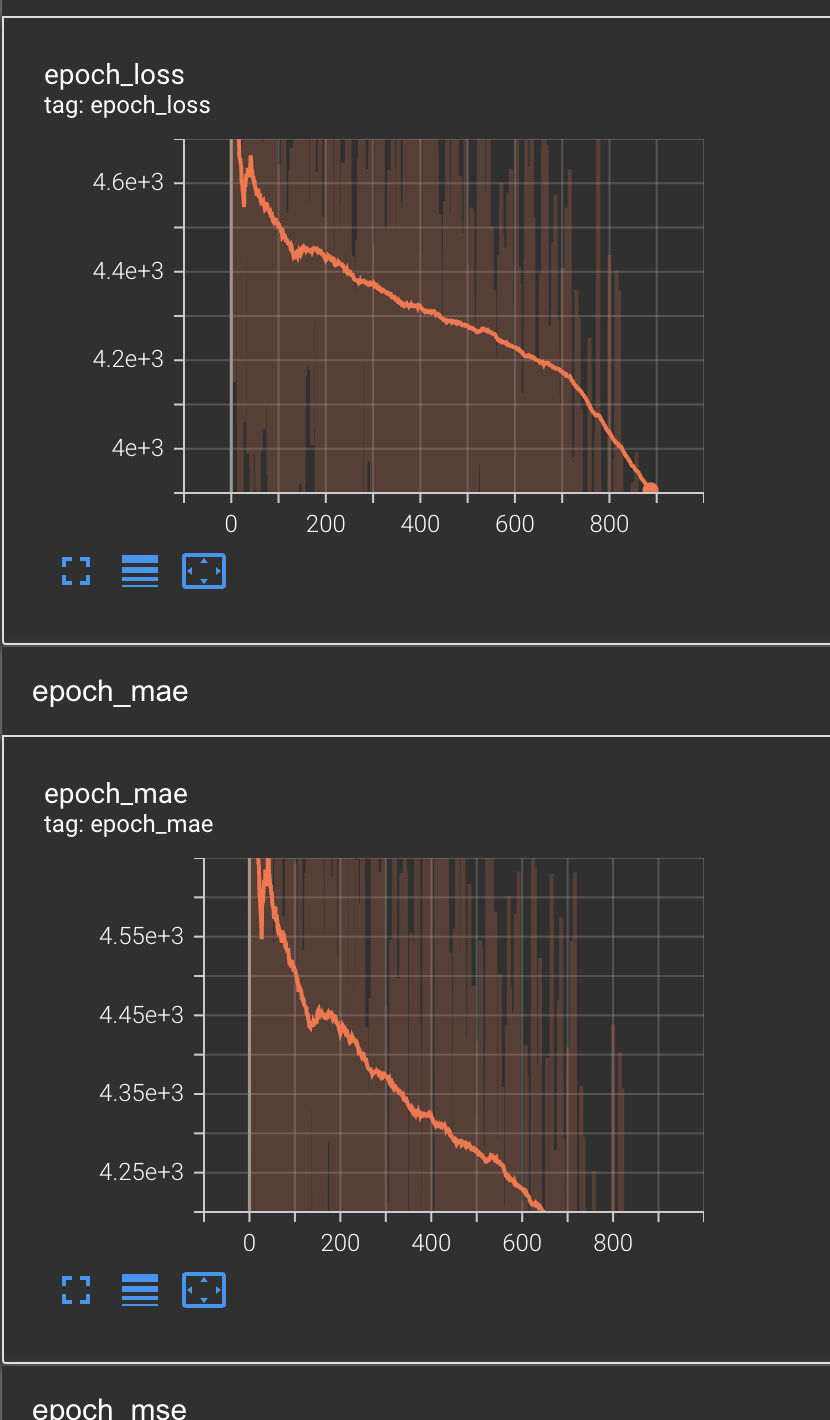

# Testing

In [33]:
testing_generator

In [34]:
for i in range(len(testing_generator)):
    x, y = testing_generator[i]
    print(i,x.shape, y.shape)

0 (32, 70, 5) (32,)
1 (32, 70, 5) (32,)
2 (32, 70, 5) (32,)
3 (32, 70, 5) (32,)
4 (32, 70, 5) (32,)
5 (32, 70, 5) (32,)
6 (32, 70, 5) (32,)
7 (32, 70, 5) (32,)
8 (32, 70, 5) (32,)
9 (32, 70, 5) (32,)
10 (32, 70, 5) (32,)
11 (32, 70, 5) (32,)
12 (32, 70, 5) (32,)
13 (32, 70, 5) (32,)
14 (32, 70, 5) (32,)
15 (32, 70, 5) (32,)
16 (32, 70, 5) (32,)
17 (32, 70, 5) (32,)
18 (32, 70, 5) (32,)
19 (32, 70, 5) (32,)
20 (32, 70, 5) (32,)
21 (32, 70, 5) (32,)
22 (32, 70, 5) (32,)
23 (32, 70, 5) (32,)
24 (32, 70, 5) (32,)
25 (32, 70, 5) (32,)
26 (32, 70, 5) (32,)
27 (32, 70, 5) (32,)
28 (32, 70, 5) (32,)
29 (32, 70, 5) (32,)
30 (32, 70, 5) (32,)
31 (32, 70, 5) (32,)
32 (32, 70, 5) (32,)
33 (32, 70, 5) (32,)
34 (32, 70, 5) (32,)
35 (32, 70, 5) (32,)
36 (32, 70, 5) (32,)
37 (32, 70, 5) (32,)
38 (32, 70, 5) (32,)
39 (32, 70, 5) (32,)
40 (32, 70, 5) (32,)
41 (32, 70, 5) (32,)
42 (32, 70, 5) (32,)
43 (32, 70, 5) (32,)
44 (32, 70, 5) (32,)
45 (32, 70, 5) (32,)
46 (32, 70, 5) (32,)
47 (32, 70, 5) (32,)
48

In [35]:
y_pred=model.predict(testing_generator)

 46/455 [==>...........................] - ETA: 0s  

2023-05-07 15:38:09.347552: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


455/455 [==============================] - 1s 1ms/step


In [36]:
print(y_pred.max())#.shape
print(y_pred.min())#.shape

6853193.0
6660997.0


In [37]:
y_pred=y_pred[:10]
y_pred

array([[6763728. ],
       [6764275.5],
       [6761563. ],
       [6762626. ],
       [6761171.5],
       [6765111. ],
       [6765469. ],
       [6768767.5],
       [6768272. ],
       [6770079.5]], dtype=float32)

In [38]:
len(y_test)#.values.shape
_y_test=np.array(y_test[:10])
_y_test

array([1479567., 1479566., 1479565., 1479564., 1479563., 1479562.,
       1479561., 1479560., 1479559., 1479558.])

In [39]:
y_test.values.max()

1479567.0

In [40]:
y_test.values.min()

1464950.0

In [42]:
#ALL TESTS

In [43]:
# ## utility - save/load the model
# import os
# import joblib

# # to save
# # joblib.dump(rf, path + '/results/random_forest_offset_RUL.joblib') 

# # to load
# rf = joblib.load(data_path + '/random_forest_offset_RUL.joblib')

### Evaluation

In [44]:

print('R^2:', metrics.r2_score(_y_test,y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(_y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(_y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(_y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(_y_test, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(_y_test, y_pred))
print('Max Error:', metrics.max_error(_y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(_y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(_y_test, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937 1882843
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313


R^2: -3386300822067.897
Mean Absolute Error (MAE): 5285543.8
Mean Squared Error (MSE): 27936981782068.4
Mean Absolute Percentage Error (MAPE): 3.5723694028074933
Root Mean Squared Error (RMSE): 5285544.606004986
Explained Variance Score: -1032768.6921212123
Max Error: 5290521.5
Mean Squared Log Error: 2.310494299978882
Median Absolute Error: 5285129.25


### Show feature importance

In [32]:
# # RF: Get feature list
# ## Learn more: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

# features = list(X_test.columns)  

# rf_imp_features = []

# ## Plot the feature importance
# def plot_feature_importance ():
#     importances = rf.feature_importances_
    
#     indices = np.argsort(importances)[len(importances)-25:] ## top 25    

#     plt.figure(figsize = (12,8))
#     plt.rcParams['font.size'] = 12
    
#     plt.title('Feature Importances')
#     plt.barh(range(len(indices)), importances[indices], color='b', align='center')

#     features_y = []
#     for x in indices:
#         features_y.append(features[x])
        
#     plt.yticks(range(len(indices)), features_y) 

#     plt.xlabel('Relative Importance')
#     plt.savefig(path + '/results/fi_offset_RUL.png') # save

#     plt.show()
#     return features_y

# rf_imp_features = plot_feature_importance()

### Prediction

In [ ]:
# get a random sample to verify the results!
## 
import matplotlib
import matplotlib.pyplot as plt
RNDSEED = np.random.seed(39)

dfs = df.sample(1000, random_state = RNDSEED) # data points
# print(dfs.rul)
X_dfs = dfs.drop('rul',axis = 1) # drop response

ys_pred = rf.predict(X_dfs)
# print(ys_pred)

rul = dfs[['rul']]
rul = rul.rename(columns={'rul': 'original'})
rul['prediction'] = ys_pred
# rul.head(5)

matplotlib.style.use('ggplot') ## styling

rul.plot.scatter(x='original', y='prediction', figsize=(16, 9), c='original', colormap='viridis') ## scatter

plt.savefig(path + '/results/offset_rul_prediction.png') # save


In [ ]:
## Plot the % of deviation 

rul['difference'] = (rul['prediction'] - rul['original']) /  rul['original']

rul.index = range(len(rul.index)) ## reset index

ax = rul.plot( y=["difference"], figsize=(16, 9))

ax.set_xlabel("Index")
ax.set_ylabel("Difference")

plt.show()

# out of couriosity 
print(len(rul[(rul['difference'] > 0.2) | (rul['difference'] < -0.2)])) # how many more than 20%? # 8 only!

In [ ]:
## styles
plt.style.available


# Working LSTM

In [291]:
# multivariate one step problem
from numpy import array
from numpy import hstack
from numpy import insert
from keras.preprocessing.sequence import TimeseriesGenerator
# define dataset
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95, 105])
out_seq = array([25, 45, 65, 85, 105, 125, 145, 165, 185, 205])
# reshape series

In [292]:

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2))

In [293]:
pd.DataFrame(dataset)



,0,1
0,10,15
1,20,25
2,30,35
3,40,45
4,50,55
5,60,65
6,70,75
7,80,85
8,90,95
9,100,105


In [294]:
#NOT DIRECTLY GO BACK ONE TIMESTEP !!!!!NOT!!!! BAD WAY
generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=1)

for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[10 15]]] => [[45]]
[[[20 25]]] => [[65]]
[[[30 35]]] => [[85]]
[[[40 45]]] => [[105]]
[[[50 55]]] => [[125]]
[[[60 65]]] => [[145]]
[[[70 75]]] => [[165]]
[[[80 85]]] => [[185]]
[[[90 95]]] => [[205]]


In [295]:

# shift the target sample by one step
out_seq = insert(out_seq, 0, 0)
#pre

out_seq = np.delete(out_seq, -1)
# define generator
n_input = 1
generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=1)
# print each sample
for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[10 15]]] => [25]
[[[20 25]]] => [45]
[[[30 35]]] => [65]
[[[40 45]]] => [85]
[[[50 55]]] => [105]
[[[60 65]]] => [125]
[[[70 75]]] => [145]
[[[80 85]]] => [165]
[[[90 95]]] => [185]


In [296]:
# define generator
n_features = dataset.shape[1]
n_input = SEQUENCE_LENGHT
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=8)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=1)


Epoch 1/500


/tmp/ipykernel_413302/1060287710.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=1)
2023-05-03 13:28:14.868586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 1s 1s/step - loss: 4717.5898
Epoch 2/500
1/1 [==============================] - 0s 16ms/step - loss: 4642.8096
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 4569.4141
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 4497.0552
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 4424.9897
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 4353.1387
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 4280.8086
Epoch 8/500
1/1 [==============================] - 0s 14ms/step - loss: 4207.4229
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 4132.2603
Epoch 10/500
1/1 [==============================] - 0s 14ms/step - loss: 4055.1626
Epoch 11/500
1/1 [==============================] - 0s 15ms/step - loss: 3975.5200
Epoch 12/500
1/1 [==============================] - 0s 14ms/step - loss: 3892.7153
Epoch 13/500
1/1 [=========

1/1 [==============================] - 0s 16ms/step - loss: 6.3450
Epoch 203/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3416
Epoch 204/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3385
Epoch 205/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3355
Epoch 206/500
1/1 [==============================] - 0s 14ms/step - loss: 6.3328
Epoch 207/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3303
Epoch 208/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3278
Epoch 209/500
1/1 [==============================] - 0s 17ms/step - loss: 6.3252
Epoch 210/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3225
Epoch 211/500
1/1 [==============================] - 0s 14ms/step - loss: 6.3196
Epoch 212/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3171
Epoch 213/500
1/1 [==============================] - 0s 14ms/step - loss: 6.3149
Epoch 214/500
1/1 [=======================

1/1 [==============================] - 0s 15ms/step - loss: 6.2548
Epoch 405/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2547
Epoch 406/500
1/1 [==============================] - 0s 14ms/step - loss: 6.2547
Epoch 407/500
1/1 [==============================] - 0s 14ms/step - loss: 6.2546
Epoch 408/500
1/1 [==============================] - 0s 14ms/step - loss: 6.2546
Epoch 409/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 410/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 411/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 412/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 413/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 414/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2545
Epoch 415/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2545
Epoch 416/500
1/1 [=======================

In [298]:
# make a one step prediction out of sample
x_input = array([[90, 95], [100, 105]]).reshape((1, n_input, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 0s 18ms/step
[[112.921326]]
